# Import Data

In [4]:
import re, sys, numpy, os
import pandas as pd
import matplotlib.pyplot as plt

# Find id

In [5]:
def find(path):
    file_list_total = os.listdir(path)

    file_list = []

    for i in range(len(file_list_total)):
        if len(file_list_total[i]) > 4:
            continue
        
        elif file_list_total[i] == '.git':
            continue
        elif file_list_total[i] == 'logs':
            continue

        else:
            file_name = str(file_list_total[i])
            file_list.append(int(file_name))

    file_list.sort()
    file_last = []

    for file in file_list:
        if file % 100 == 0:
            file_last = file
        else:
            exit

    return file_last
id = find('airFoil2D')
print(find('airFoil2D'))


4000


In [6]:
os.chdir('airFoil2D')
with open(r'constant/polyMesh/points', 'r') as fpoints:
    points_database = fpoints.read()

with open(r'constant/polyMesh/faces', 'r') as ffaces:
    faces_database = ffaces.read()

with open(f'{id}/wallShearStress', 'r') as fstress:
    stress_database = fstress.read()

with open(r'constant/polyMesh/boundary', 'r') as boundary:
    boundary = boundary.read()

os.chdir('..')
dref = pd.read_csv('Reference ShearStress..csv')

# Data Process

Points, Faces, and Shear Stress

In [7]:
points = re.findall('\(.*\)', points_database)

faces = re.findall('\(.*\)', faces_database)

stress_database = stress_database.replace('(0 0 0)', '')
stress = re.findall('\(.*\)', stress_database)


Boundary ( nFaces & startFace )

In [8]:
temp = re.split('(aerofoil)', boundary)[2]
for item in re.finditer('(nFaces[\s]*)([\w]*)', temp):
    nFaces = item.group(2)

for item in re.finditer('(startFace[\s]*)([\w]*)', temp):
    startFace = item.group(2)

# print(nFaces, startFace)

endFaces = int(startFace) + int(nFaces)

Faces

In [9]:
faces_total = []
Faces = []

for item in faces:
    faces_total.append(re.findall('[\w]*', item)[1])

Faces = faces_total[int(startFace):endFaces]

Points on airfoil ( x, y coordinate)

In [10]:
x_total = []
X = []
y_total = []
Y = []
for index in range(len(points)):
    for item in re.finditer('(\()([\S ]*)(\))', points[index]):
        x_total.append(float(re.findall('[\S]*', item.group(2))[0]))
        y_total.append(float(re.findall('[\S]*', item.group(2))[2]))

for item in Faces:
    index = int(item)
    X.append(x_total[index])
    Y.append(y_total[index])


Shear Stress

In [11]:
Tau_x = []
Tau_y = []
for item in stress:
    for item in re.finditer('(\()([\S ]*)(\))', item):
        Taudata = item.group(2)
        Tau_x.append(float(re.split('[\ ]', Taudata)[0]))
        Tau_y.append(float(re.split('[\ ]', Taudata)[1]))


# Construct DataFrame

In [12]:
df = pd.DataFrame(X,columns={'x'})
df['y'] = Y
df['X Shear Stress'] = Tau_x
df['Y Shear Stress'] = Tau_y
df['Shear Stress'] = numpy.sqrt(numpy.square(df['X Shear Stress']) + numpy.square(df['Y Shear Stress']))

Dynamic Pressure

In [13]:
q = 0.5 * 1 * numpy.square(40)
df['Shear Stress'] = df['Shear Stress'] / q

Classify into upper surface of the airfoil

In [14]:
df = df[df['y'] > 0]
df = df.sort_values('x')
df

,x,y,X Shear Stress,Y Shear Stress,Shear Stress
450,0.000198,0.002489,31.27250,132.32600,0.108777
449,0.000780,0.004917,35.38860,89.93860,0.077320
448,0.001709,0.007234,23.57110,46.10330,0.041424
447,0.002927,0.009415,14.05650,20.67320,0.019999
446,0.004376,0.011450,1.20087,2.30676,0.002080
...,...,...,...,...,...
5,0.990099,0.002641,-94.64490,13.21340,0.076450
6,0.992575,0.002297,-104.49200,14.73510,0.084421
3,0.995050,0.001952,-122.84700,17.60270,0.099281
14,0.997525,0.001607,-174.51900,20.84040,0.140607


# Plot the diagram

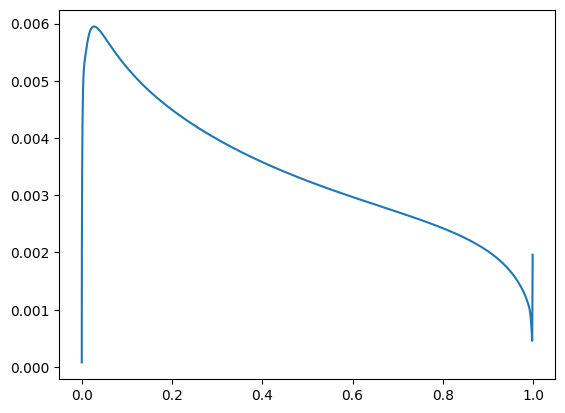

In [15]:
plt.plot(dref['x'], dref[' shear stress'])

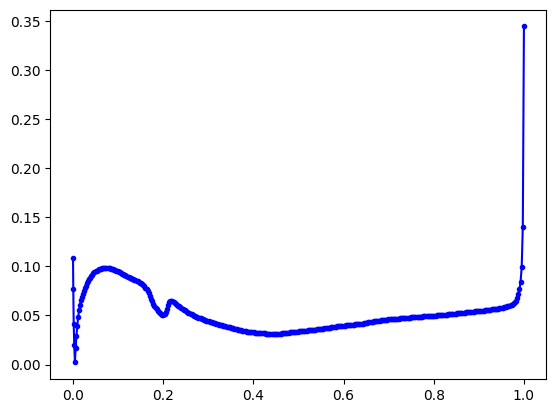

In [16]:
plt.plot(df['x'],df['Shear Stress'], 'b-o',ms=3 , label='Plot 1')


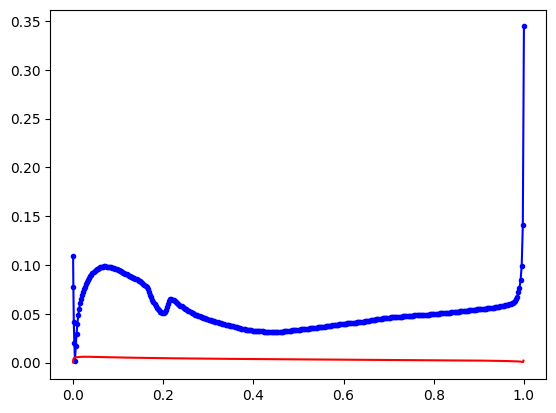

In [17]:
plt.plot(df['x'],df['Shear Stress'], 'b-o',ms=3 , label='Plot 1')
plt.plot(dref['x'], dref[' shear stress'], color= 'red', label='Plot 2')
plt.show()